# MODULE -3

## FINDAMENTAL ANALYSIS USING REGRESSION

In [65]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm

In [66]:
gold = pd.read_csv('GOLD.csv')
gold.info()
gold.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      512 non-null    object 
 1   Price     512 non-null    int64  
 2   Open      512 non-null    int64  
 3   High      512 non-null    int64  
 4   Low       512 non-null    int64  
 5   Vol.      512 non-null    object 
 6   Change %  512 non-null    object 
 7   Pred      411 non-null    float64
 8   new       512 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [67]:
gold_train= gold.dropna()
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 410
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      411 non-null    object 
 1   Price     411 non-null    int64  
 2   Open      411 non-null    int64  
 3   High      411 non-null    int64  
 4   Low       411 non-null    int64  
 5   Vol.      411 non-null    object 
 6   Change %  411 non-null    object 
 7   Pred      411 non-null    float64
 8   new       411 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 32.1+ KB


In [68]:
gold_train.describe()

,Price,Open,High,Low,Pred,new
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,29934.956204,29931.501217,30051.121655,29817.895377,341.712895,237.811874
std,1004.074382,1003.263473,1012.606075,994.941509,271.075609,201.208916
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29220.500000,29221.500000,29344.500000,29111.000000,156.500000,100.716619
50%,29957.000000,29960.000000,30096.000000,29830.000000,299.000000,173.315183
75%,30705.000000,30700.000000,30837.500000,30580.000000,475.000000,308.057815
max,31895.000000,31877.000000,32075.000000,31725.000000,2210.000000,1121.430991


### inferance 
 It is very clear after using describe() method that the 'new' column is a *polynomial* function of the inputs and the 'Pred' column is a linear model. It is evident from looking at the standard deviation that 'new' has **low variance** as compared to 'Pred', as this is possible only if there is a curve fitted into the data(in case of polynomial function) whereas, since Pred is a linear combination of inputs, there will be a line fitted into the data and thus, incurring a higher variance due to outliers.


## linear regression model


In [69]:
linear_mod = LinearRegression()
X_train = gold_train[['Price','Open','High','Low']].values
y_train = gold_train['Pred'].values. reshape(-1,1)
linear_mod.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Co-efficent 

In [70]:
co = linear_mod.coef_.reshape(-1,1)
co


array([[ 2.],
       [ 3.],
       [-1.],
       [-4.]])

In [71]:
coeff_pred = pd.DataFrame(co,['Price','Open','High','Low'],columns=['co-efficent'])
coeff_pred

,co-efficent
Price,2.0
Open,3.0
High,-1.0
Low,-4.0


###  filling predict column using the same model

In [72]:
X_full = gold[['Price','Open','High','Low']].values
y_pred = linear_mod.predict(X_full)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       512 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [73]:
gold['Pred']=y_pred_df
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      512 non-null    object 
 1   Price     512 non-null    int64  
 2   Open      512 non-null    int64  
 3   High      512 non-null    int64  
 4   Low       512 non-null    int64  
 5   Vol.      512 non-null    object 
 6   Change %  512 non-null    object 
 7   Pred      512 non-null    float64
 8   new       512 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


## Polynomial model


In [74]:
# spliting into features and labels
X = gold[['Price','Open','High','Low']].values
Y = gold['new'].values
# spliting into train and test sets
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.2)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
X_train.shape,X_test.shape,y_train.shape

# fiting model
regress_poly = LinearRegression()

regress_poly.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:




 # evaluating the model
new_pred = regress_poly.predict(X_test)
new_pred.dtype,y_test.dtype
regress_poly.score(X_test,y_test)

0.9999901742208237

In [76]:
regress_poly.predict(X).shape,Y.reshape(-1,1).shape

((512, 1), (512, 1))

In [77]:
r2_score(Y, regress_poly.predict(X))

0.9999886432824331

### Co-efficent 

In [78]:
co_new = regress_poly.coef_.reshape(-1,1)
co_new_df = pd.DataFrame(co_new,['Price','Open','High','Low'],columns=['co-efficent'])
co_new_df

,co-efficent
Price,1.013039
Open,-1.000300
High,1.005123
Low,-1.017938


## ploting distplot and histogram

[Text(0.5, 1.0, 'New')]

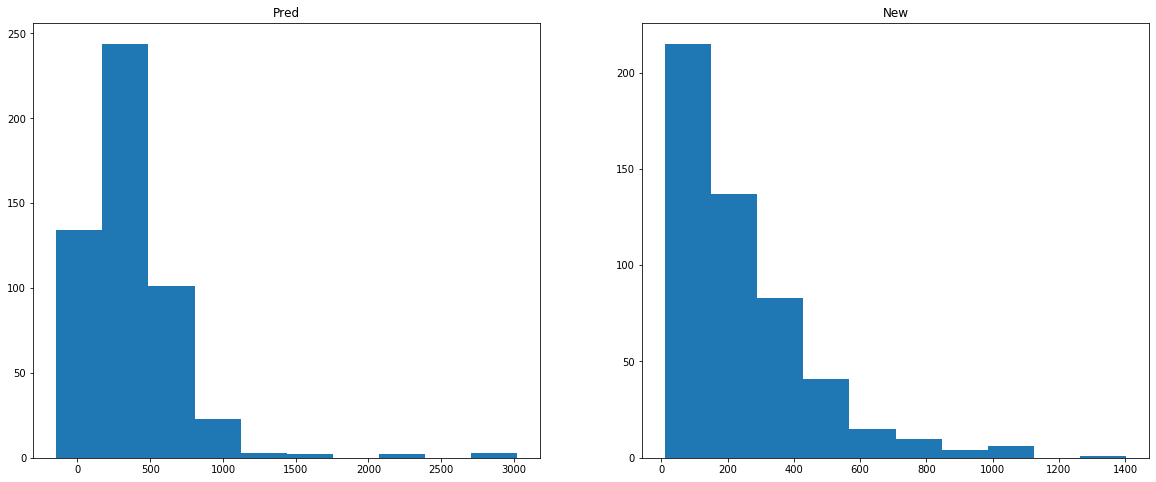

In [79]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
ax[0].hist(y_pred)
ax[0].set(title='Pred')
ax[1].hist(regress_poly.predict(X))
ax[1].set(title='New')

Text(0.5, 1.0, 'Pred')

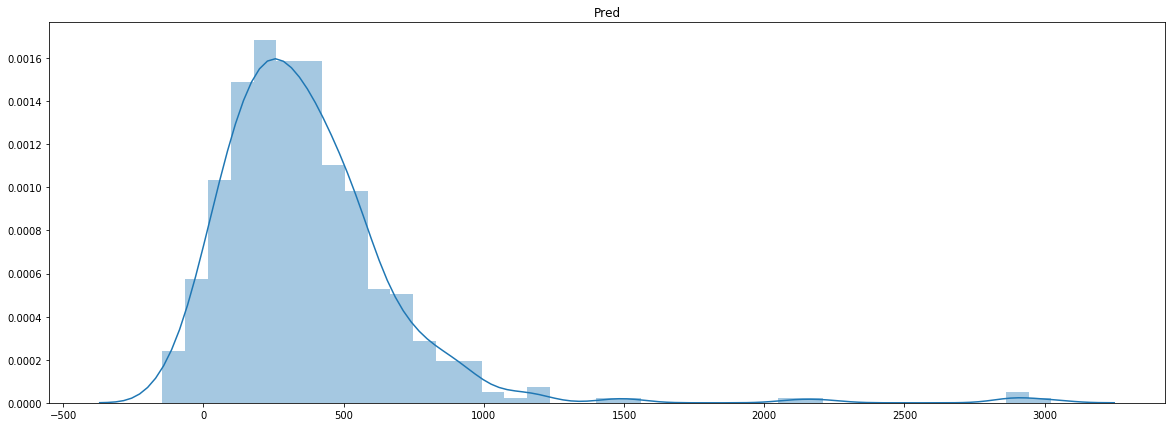

In [80]:
# distplot of pred predicted
plt.figure(figsize=(20,7))
sns.distplot(y_pred)
plt.title ('Pred')

Text(0.5, 1.0, 'New')

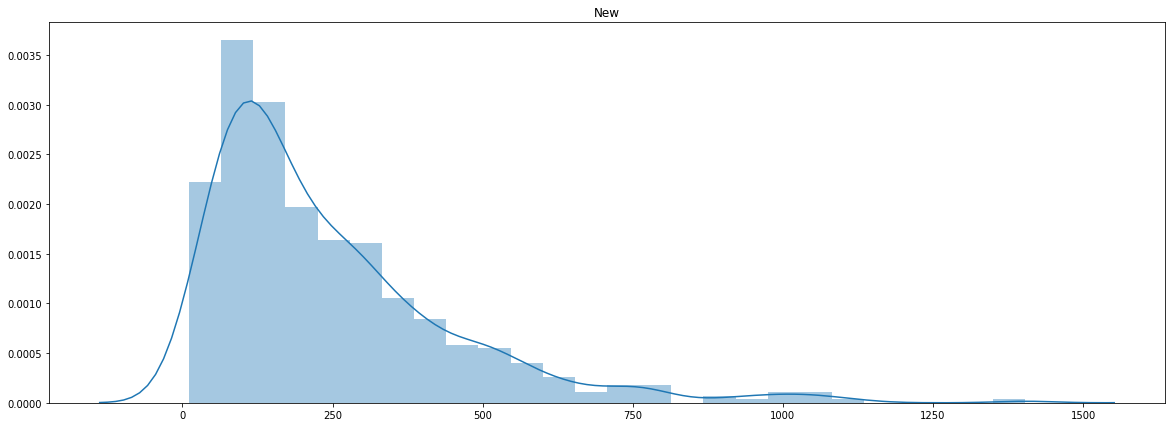

In [81]:
# distplot of New predicted
ax,fig = plt.subplots(figsize=(20,7))
sns.distplot( regress_poly.predict(X))
plt.title ('New')

# 3.2
## FInding daily BETA for last 3 months and monthly BETA


In [82]:
# importing and cleaning the nifty dataset
info = pd.read_csv('.\Large_Cap\INFY.csv')
nifty = pd.read_csv('Nifty50.csv')
per_change = pd.DataFrame(index=nifty['Date'])
nifty

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...,...
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19


In [83]:
info= info[info['Series']=='EQ']
info=info.set_index('Date')
nifty= nifty.set_index('Date')
info

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
15-May-2017,INFY,EQ,964.25,963.50,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67
16-May-2017,INFY,EQ,951.55,953.10,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62
17-May-2017,INFY,EQ,955.00,951.60,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35
18-May-2017,INFY,EQ,952.80,943.00,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32
19-May-2017,INFY,EQ,961.75,961.50,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
07-May-2019,INFY,EQ,718.40,720.40,727.90,718.70,724.40,724.55,724.51,5747536,4.164127e+09,104342,3690425,64.21
08-May-2019,INFY,EQ,724.55,721.00,726.00,716.50,718.95,719.35,721.65,6247642,4.508603e+09,162077,3950857,63.24
09-May-2019,INFY,EQ,719.35,719.15,730.30,715.80,722.00,721.05,724.48,7396525,5.358635e+09,242225,4808832,65.01


In [84]:
info.index = pd.to_datetime(info.index)
nifty.index = pd.to_datetime(nifty.index)
per_change.index = pd.to_datetime(per_change.index)


In [85]:
per_change_nifty = nifty['Close'].pct_change()*100
per_change_info = info['Close Price'].pct_change()*100
per_change['pct Nifty'] = per_change_nifty
per_change['pct Info'] = per_change_info
per_change = per_change.dropna()

In [86]:
# slicng just last 3 months data
per_change_3month = per_change[-90:]
per_change_3month

,pct Nifty,pct Info
Date,,
2018-12-31,0.024402,0.304437
2019-01-01,0.437743,0.925715
2019-01-02,-1.077900,0.601459
2019-01-03,-1.114200,0.014947
2019-01-04,0.516292,-1.210491
...,...,...
2019-05-07,-0.865217,0.856069
2019-05-08,-1.204133,-0.717687
2019-05-09,-0.507507,0.236324


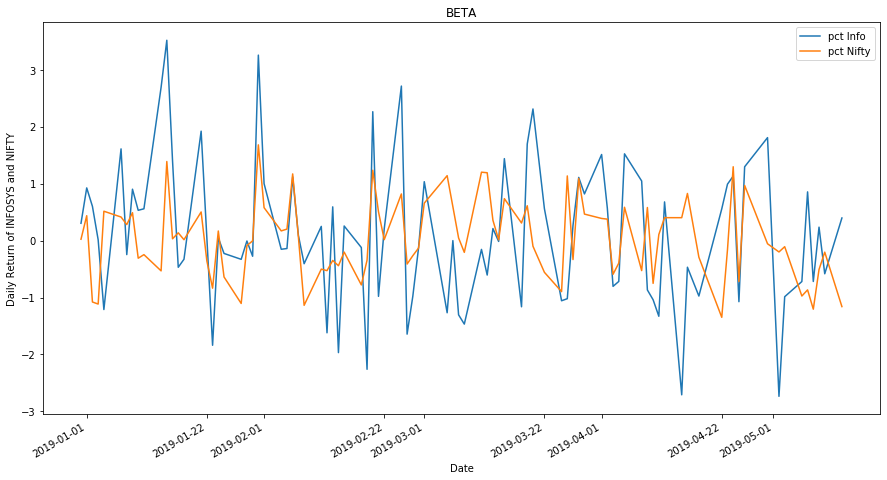

In [87]:

# ploting graph
plt.figure(figsize=(15,8))
per_change_3month['pct Info'].plot()
per_change_3month['pct Nifty'].plot()
plt.ylabel("Daily Return of INFOSYS and NIFTY")
plt.title('BETA')
plt.legend()
plt.show()

In [103]:
y = per_change_3month['pct Nifty']
X = per_change_3month['pct Info']
model = sm.OLS(X,y).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               pct Info   R-squared (uncentered):                   0.128
Model:                            OLS   Adj. R-squared (uncentered):              0.118
Method:                 Least Squares   F-statistic:                              13.08
Date:                Wed, 16 Sep 2020   Prob (F-statistic):                    0.000494
Time:                        15:46:29   Log-Likelihood:                         -141.63
No. Observations:                  90   AIC:                                      285.3
Df Residuals:                      89   BIC:                                      287.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pct Nifty      0.6549      0.181      3.617      0.000       0.295       1.015
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.138
Skew:                          -0.086   Prob(JB):                        0.933
Kurtosis:                       2.915   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# resampling based on months to get monthly BETA
y_monthly = per_change['pct Nifty'].resample('M').sum()
y_monthly

Date
2017-05-31    1.871176
2017-06-30   -1.036267
2017-07-31    5.706310
2017-08-31   -1.539423
2017-09-30   -1.271474
2017-10-31    5.464318
2017-11-30   -1.021647
2017-12-31    2.969640
2018-01-31    4.642152
2018-02-28   -4.892785
2018-03-31   -3.603498
2018-04-30    6.043144
2018-05-31    0.013466
2018-06-30   -0.167022
2018-07-31    5.851201
2018-08-31    2.844541
2018-09-30   -6.565531
2018-10-31   -4.881442
2018-11-30    4.665272
2018-12-31   -0.041297
2019-01-31   -0.234867
2019-02-28   -0.318714
2019-03-31    7.471307
2019-04-30    1.105292
2019-05-31   -5.217412
Freq: M, Name: pct Nifty, dtype: float64

In [100]:
x_monthly = per_change['pct Info'].resample('M').sum()
x_monthly = x_monthly.values.reshape(-1,1)
y_monthly = y_monthly.values.reshape(-1,1)

In [101]:
y_monthly

array([[ 1.87117604],
       [-1.03626707],
       [ 5.70630976],
       [-1.53942327],
       [-1.27147398],
       [ 5.46431753],
       [-1.02164722],
       [ 2.9696397 ],
       [ 4.64215161],
       [-4.89278492],
       [-3.60349756],
       [ 6.04314363],
       [ 0.01346567],
       [-0.1670221 ],
       [ 5.851201  ],
       [ 2.84454066],
       [-6.56553071],
       [-4.88144188],
       [ 4.66527238],
       [-0.04129661],
       [-0.23486681],
       [-0.31871414],
       [ 7.47130697],
       [ 1.10529246],
       [-5.21741242]])

In [105]:

model = sm.OLS(x_monthly,y_monthly).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.285
Model:                            OLS   Adj. R-squared (uncentered):              0.255
Method:                 Least Squares   F-statistic:                              9.571
Date:                Wed, 16 Sep 2020   Prob (F-statistic):                     0.00496
Time:                        15:48:21   Log-Likelihood:                         -92.103
No. Observations:                  25   AIC:                                      186.2
Df Residuals:                      24   BIC:                                      187.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### BETA  = 1.537 
 Since BETA value is less greater than one the stock is more volitile than the benchmark (ie NIfty50)


### if BETA is -ve 
 if the beta value is negative , this implies that if market returns are profitable, then the individual stock's returns are likely to be in loss and vice-versa. Such stocks can be used in portfolios to minimize the potenical loss.
